# Taak AI - Computer Vision

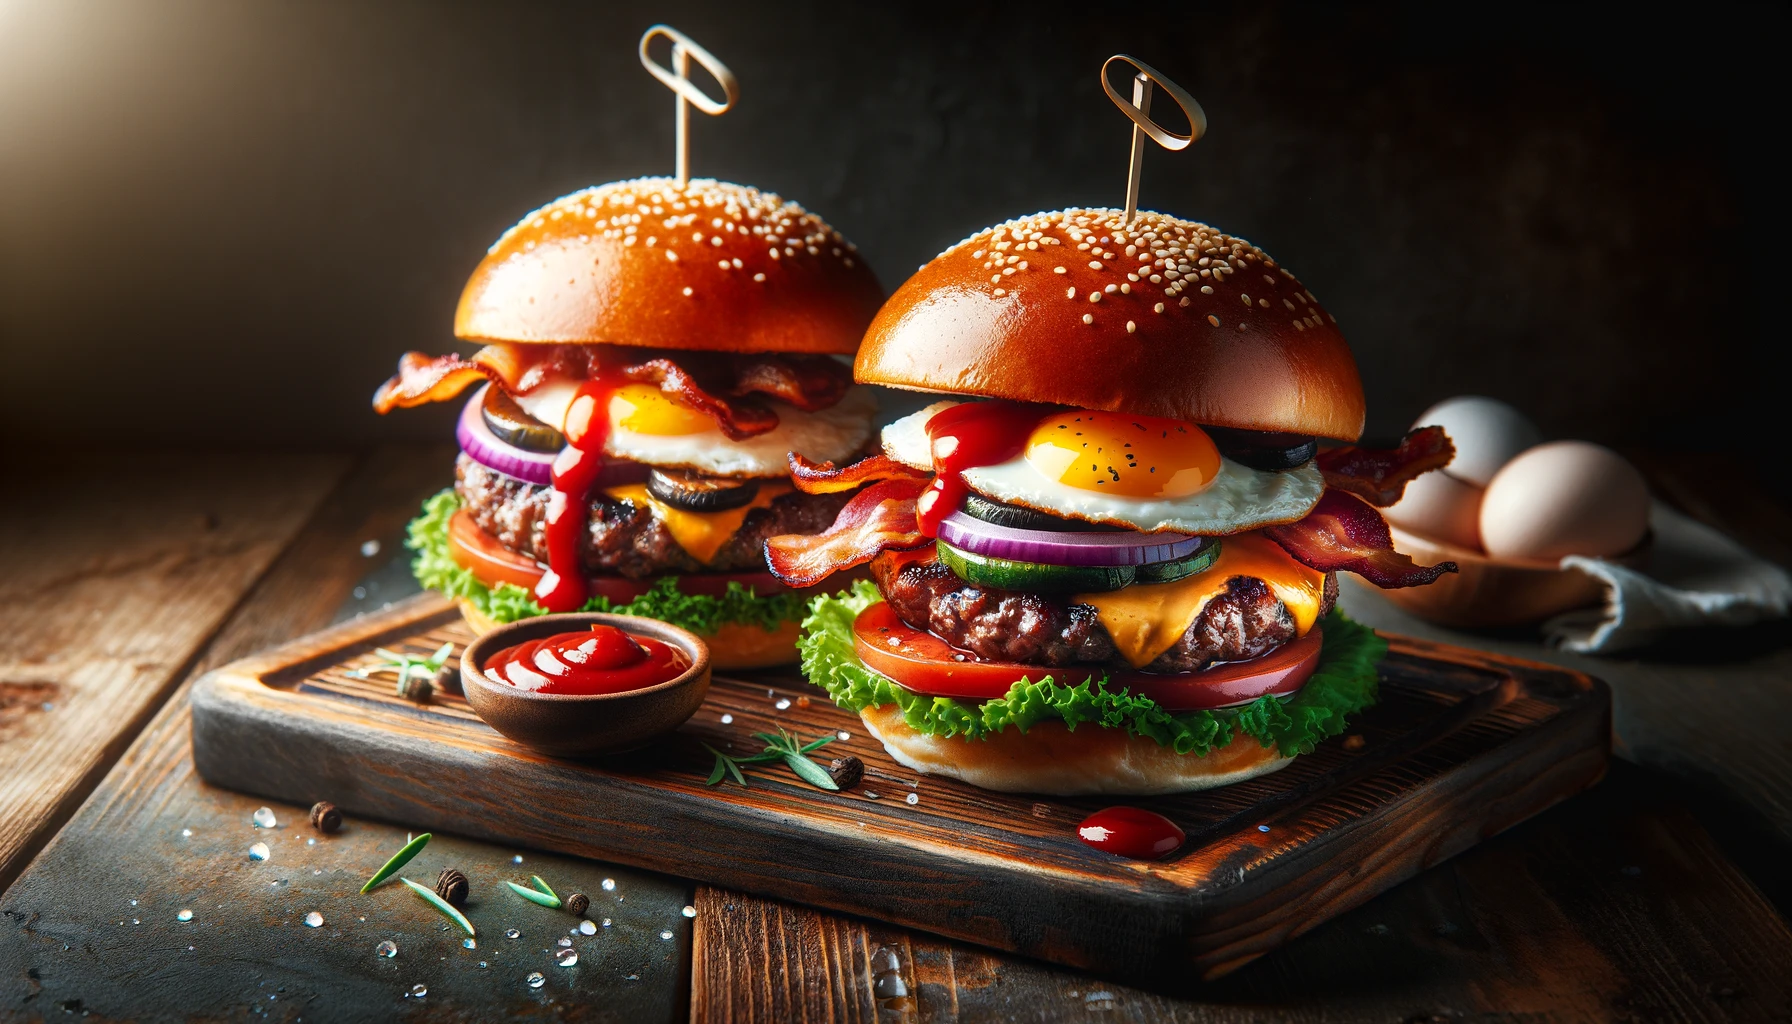

# Opgave: Classificatie van afbeeldingen mbv een Convolutioneel Neuraal Netwerk

## Doelstelling

Het doel van deze opgave is het classificeren van afbeeldingen met behulp van een **Convolutioneel Neuraal Netwerk (CNN)**. Gebruik de dataset die wordt aangeleverd om je model te trainen en te testen. Je hebt de keuze tussen **PyTorch en Tensorflow** als ML framework. 

**BELANGRIJK! VOLG DE BEST PRACTICES ZOALS GEZIEN IN DE THEORIELES!**

## Werkwijze

1. **Code en tekst**: Voeg je eigen code en tekst toe in deze notebook. Zorg voor een heldere structuur en logische volgorde.

2. **Argumentatie**: Onderbouw duidelijk je gemaakte keuzes. Een goed presterend model is belangrijk, maar de argumentatie achter je keuzes is essentieel om je begrip van de materie aan te tonen. Documenteer je voortgang en bevindingen rechtstreeks in de notebook.

3. **Technieken en experimenten**: Je bent niet beperkt tot de technieken besproken in de theorie/labo. Voel je vrij om andere methodes te verkennen, maar zorg dat je experimenten en keuzes goed onderbouwd zijn.

5. **Tip**: Maak gebruik van de TensorFlow / PyTorch API documentatie. Plaats je cursor binnen de haakjes van een Python functie en druk op SHIFT + TAB om de functie-documentatie te raadplegen.

## Verbetersleutel

|  Onderdeel                                    | # punten |
|-----------------------------------------------|:--------:|
|  Data inlezen, voorbereiden en analyseren           |    /3    |
|  ML model definitie + training                                    |    /4    |
|  &emsp;- Lagen, neuronen, en activatiefuncties      |
|  &emsp;- Keuze van loss functie en evaluatiemetrics |
|  &emsp;- Keuze van optimizer (vergelijk minstens 2 optimizers en toon deze vergelijking dmv code en tekst!) |
|  Regularisatie                    |    /6    |
|  &emsp; Test en bespreek minstens 4 regularisatietechnieken |
|  Model evaluatie                     |    /3    |
|  &emsp; Hoe goed presteert het model op ongeziene data? |
|  Rapportering                     |    /4    |
|  &emsp; Heldere en duidelijke argumentatie verspreid als Markdown tussen je code-cellen) |
|  **Totaal**                       |    /20   |

### Belangrijk bij de beoordeling:

- **Duidelijkheid**: Hoe helder en logisch is jouw aanpak?
- **Onderbouwing**: In hoeverre zijn de technische keuzes en experimenten goed onderbouwd en verantwoord?
- **Resultaten**: Hoe effectief zijn de toegepaste technieken en hoe goed presteert het uiteindelijke model (op ongeziene data)?

### Praktische afspraken:
Dit project wordt **ten laatste** ingediend op Toledo voor donderdag 12 december om 20u.

Hiervoor maak je een .ZIP bestand van je notebook en eventueel extra data die je nodig hebt om jouw notebook uit te voeren. Bezorg je **uitgevoerde notebook**, zodat we jouw output kunnen zien in het geval niet alle code bij ons uitvoerbaar is. De dataset zelf hoef je niet mee te sturen. 

#### Alvast veel succes!

## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data inlezen, voorbereiden en analyseren

_Het is niet de bedoeling dat je de dataset zelf nog aanvult, maar je mag bijvoorbeeld wel gebruik maken van Transfer Learning._

- Data exploratie: Onderzoek de gegevens om inzicht te krijgen in de distributie, mogelijke outliers, en basisstatistieken.
- Data cleaning: Verwijder of corrigeer onjuiste, onvolledige of irrelevante gegevens.
- Feature engineering: Transformeer de ruwe gegevens in een vorm die beter geschikt is voor modellering. 
- Data splitsen: Verdeel de gegevens in trainings-, validatie- en testsets.

In [2]:
dataset_path = "./dataset"
width = 64
height = 64
batch_size = 32

# Dataset splitsen in training- en testset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 20% van de data voor de testset
    subset="training",  # Trainingset selecteren
    seed=42,  # Zorg voor reproduceerbare splitsing
    image_size=(width,height),  # Alle afbeeldingen schalen naar 224x224 pixels
    batch_size=batch_size # Batches van 32 samples
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,  # 20% van de data voor de testset
    subset="validation",  # Testset selecteren
    seed=42,
    image_size=(width,height),
    batch_size=batch_size
)


Found 18631 files belonging to 101 classes.
Using 14905 files for training.
Found 18631 files belonging to 101 classes.
Using 3726 files for validation.


In [3]:
# Klassen bekijken
class_names = train_ds.class_names
print("Klassen:", class_names)
# Normaliseer de data door de pixelwaarden te delen door 255.0

# Controleer de grootte van de datasets
print(f"Trainingset: {len(train_ds)} batches")
print(f"Testset: {len(test_ds)} batches")

Klassen: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 

In [4]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

for images, labels in train_ds.take(1):
    print("Pixelwaarde vóór normalisatie:", images[0].numpy().max()) 
    print("Label:", labels[0].numpy())  # Behoud de labels

Pixelwaarde vóór normalisatie: 1.0
Label: 17


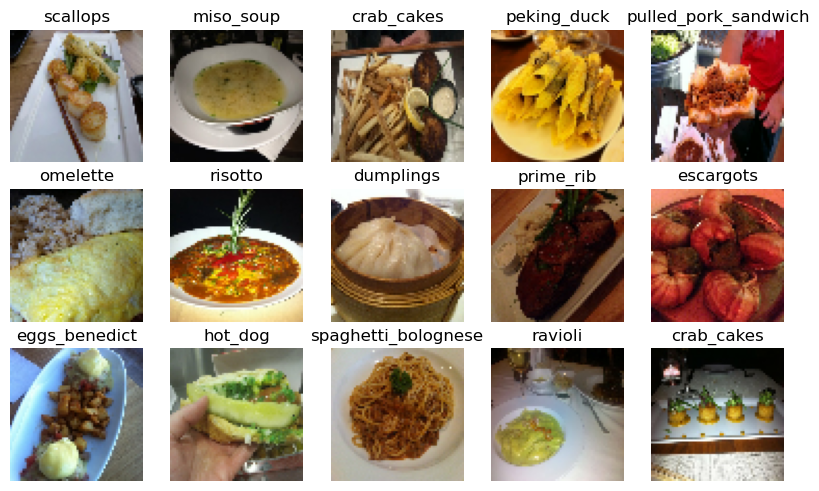

In [5]:
plt.figure(figsize=(10, 10))

# Neem één batch van de trainingsset
for images, labels in train_ds.take(1):  # Haalt één batch van afbeeldingen op
    for i in range(15):  # Toon maximaal 25 afbeeldingen
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy())  # Zet het beeld om naar numpy
        plt.title(class_names[labels[i]])  # Gebruik de klasse om het label te tonen
        plt.axis("off")  # Geen assen weergeven

plt.show()

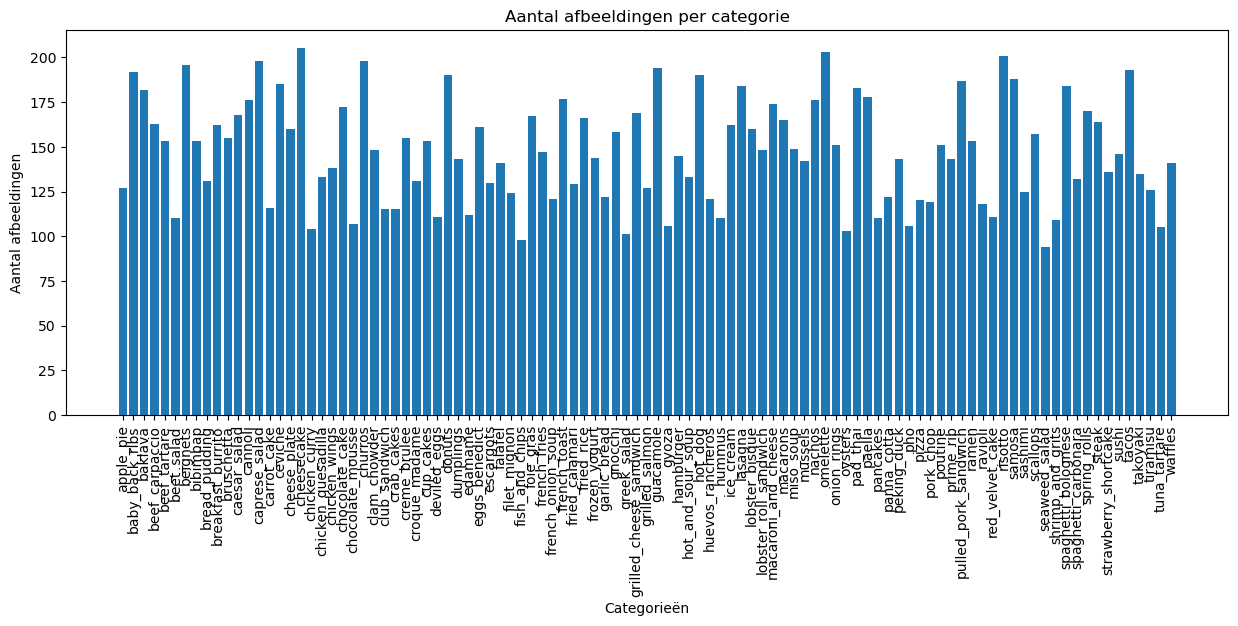

In [6]:
# Verzamel alle labels
all_labels = []
for _, labels in train_ds.unbatch():
    all_labels.append(labels.numpy())

# Converteer de verzamelde labels naar een numpy-array
all_labels = np.array(all_labels)

# Tel het aantal afbeeldingen per categorie
unique_labels, counts = np.unique(all_labels, return_counts=True)

# Maak een staafdiagram
plt.figure(figsize=(15, 5))
plt.bar([class_names[i] for i in unique_labels], counts)
plt.xlabel("Categorieën")
plt.ylabel("Aantal afbeeldingen")
plt.title("Aantal afbeeldingen per categorie")
plt.xticks(rotation=90)
plt.show()


## ML Model definitie

- Kies een model type: Beslis welk type model (bijv. regressie, classificatie, clustering) het meest geschikt is voor het probleem.
- Configureer het model: Stel de parameters en de structuur van het model in (zoals de architectuur van je CNN).
- Initialisatie van het model: Bereid het model voor op training door bv. de gewichten te initialiseren.

In [7]:
model = models.Sequential([
    # Eerste Convolutionele Laag
    layers.Input(shape=(width,height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Max Pooling om de dimensies te verkleinen)
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    # Volledig Verbonden Laag
    layers.Dense(128, activation='relu'),  # 128 neuronen
    layers.Dense(len(class_names), activation='softmax')  # Aantal neuronen = aantal klassen
])

# Model Overzicht
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638,181 (6.25 MB)

 Trainable params: 1,638,181 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Training

Train je model op de aangeleverde dataset. Voorzie een goede verdeling tussen training- en testset.

- Kies een trainingsalgoritme: Met welk algoritme ga je jouw model trainen (bijv. gradient descent)?
- Optimalisatie: Pas de modelparameters aan om de voorspellingsfout op de trainingsdata te minimaliseren.
- Hyperparameter tuning: Experimenteer met verschillende instellingen van de hyperparameters om de beste resultaten te krijgen (zoals bv. de learning rate).
- Monitoring van het trainingsproces: Houd de prestaties van het model tijdens het trainingsproces in de gaten om overfitting of andere problemen te identificeren **(voorzie een duidelijke plot in je notebook!)**.

In [9]:
history_adam = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.0128 - loss: 4.6126 - val_accuracy: 0.0368 - val_loss: 4.4495
Epoch 2/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.0547 - loss: 4.3550 - val_accuracy: 0.0733 - val_loss: 4.2030
Epoch 3/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.0942 - loss: 4.0598 - val_accuracy: 0.0886 - val_loss: 4.0885
Epoch 4/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.1391 - loss: 3.7649 - val_accuracy: 0.0939 - val_loss: 4.1020
Epoch 5/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.1897 - loss: 3.4428 - val_accuracy: 0.0902 - val_loss: 4.2242
Epoch 6/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.2479 - loss: 3.1219 - val_accuracy: 0.0875 - val_loss: 4.4696
Epoch 7/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.3142 - loss: 2.7821 - val_accuracy: 0.0843 - val_loss: 4.7940
Epoch 8/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.3934 - loss: 2.4248 - 

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0732 - loss: 6.2270
Test Loss: 6.3076348304748535
Test Accuracy: 7.06%


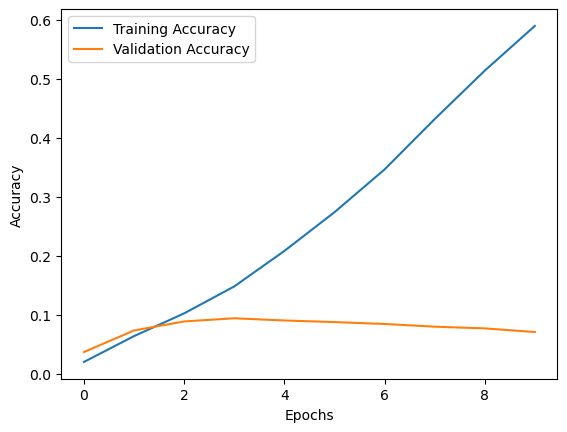

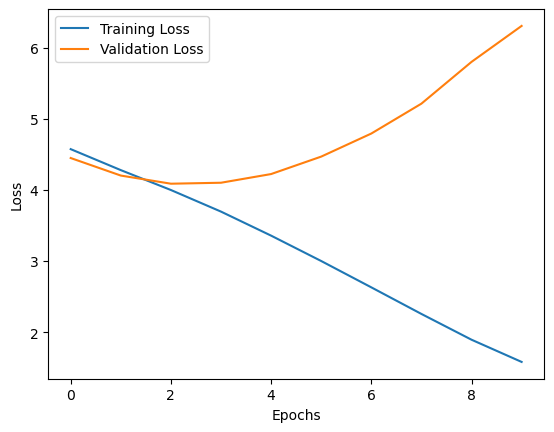

In [10]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy
plt.plot(history_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

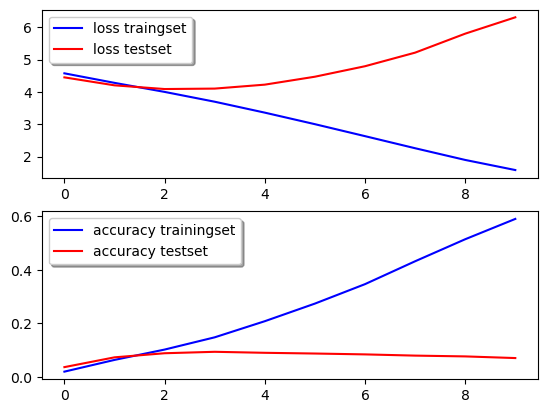

In [11]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history_adam.history['loss'], color='b', label='loss traingset')
ax[0].plot(history_adam.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_adam.history['accuracy'], 
           color='b', label='accuracy trainingset')
ax[1].plot(history_adam.history['val_accuracy'], 
           color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

In [12]:
model = models.Sequential([
    # Eerste Convolutionele Laag
    layers.Input(shape=(width,height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),  # Max Pooling om de dimensies te verkleinen)
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    # Volledig Verbonden Laag
    layers.Dense(128, activation='relu'),  # 128 neuronen
    layers.Dense(len(class_names), activation='softmax')  # Aantal neuronen = aantal klassen
])

model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_RMS = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10


C:\Users\frederic\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.0163 - loss: 4.6354 - val_accuracy: 0.0480 - val_loss: 4.3803
Epoch 2/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.0623 - loss: 4.2849 - val_accuracy: 0.0674 - val_loss: 4.2390
Epoch 3/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.1039 - loss: 4.0030 - val_accuracy: 0.0859 - val_loss: 4.1740
Epoch 4/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.1545 - loss: 3.6814 - val_accuracy: 0.0913 - val_loss: 4.2960
Epoch 5/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.2147 - loss: 3.3009 - val_accuracy: 0.0913 - val_loss: 4.3954
Epoch 6/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.3020 - loss: 2.8541 - val_accuracy: 0.0969 - val_loss: 4.5464
Epoch 7/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.4206 - loss: 2.3348 - val_accuracy: 0.0958 - val_loss: 5.2357
Epoch 8/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.5427 - loss: 1.7842 - val_accurac

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0850 - loss: 8.3797
Test Loss: 8.37134838104248
Test Accuracy: 8.45%


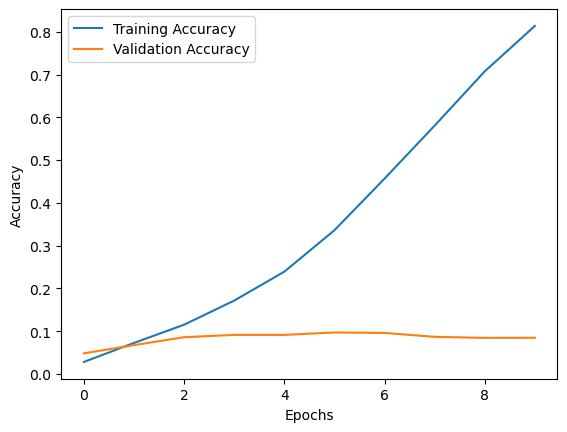

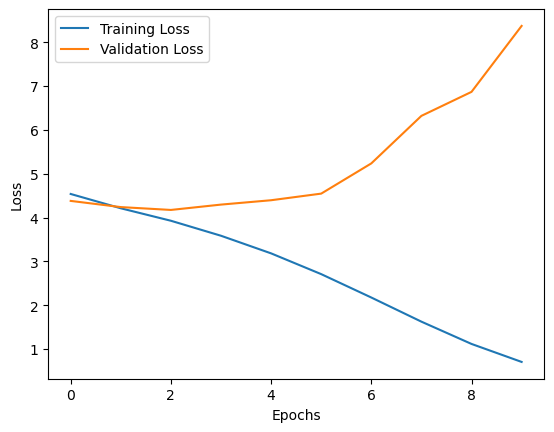

In [13]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot accuracy
plt.plot(history_RMS.history['accuracy'], label='Training Accuracy')
plt.plot(history_RMS.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_RMS.history['loss'], label='Training Loss')
plt.plot(history_RMS.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

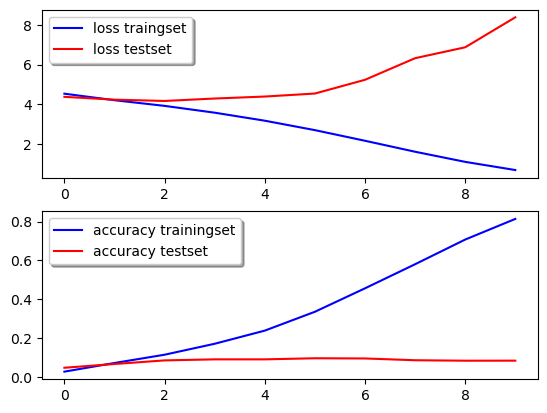

In [14]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history_RMS.history['loss'], color='b', label='loss traingset')
ax[0].plot(history_RMS.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_RMS.history['accuracy'], 
           color='b', label='accuracy trainingset')
ax[1].plot(history_RMS.history['val_accuracy'], 
           color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

RMSprop scoort beter dan adam omdat RMSprop beter geschikt is voor kleinere en complexere datasets.

## Regularisatie

Test en bespreek minimaal vier verschillende regularisatietechnieken. Het is cruciaal om elke techniek afzonderlijk te testen en te vergelijken met je standaardmodel zonder regularisatie. Dit is nodig om het individuele effect van elke techniek nauwkeurig te kunnen beoordelen.

### Techniek 1:

Dropout "schakelt" willekeurig een fractie van de neuronen uit tijdens de training, waardoor het model minder afhankelijk wordt van specifieke neuronen en overfitting voorkomt. Je gaat meer generalizeren.

In [15]:
model_dropout = models.Sequential([
    layers.Input(shape=(width, height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # 50% van de neuronen worden uitgeschakeld
    layers.Dense(len(class_names), activation='softmax')
])

In [16]:
model_dropout.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_dropout.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638,181 (6.25 MB)

 Trainable params: 1,638,181 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history_dropout = model_dropout.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.0112 - loss: 4.6119 - val_accuracy: 0.0290 - val_loss: 4.5094
Epoch 2/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.0304 - loss: 4.4829 - val_accuracy: 0.0472 - val_loss: 4.3719
Epoch 3/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0502 - loss: 4.3276 - val_accuracy: 0.0639 - val_loss: 4.2466
Epoch 4/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.0669 - loss: 4.1830 - val_accuracy: 0.0757 - val_loss: 4.1518
Epoch 5/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0888 - loss: 4.0526 - val_accuracy: 0.0870 - val_loss: 4.1230
Epoch 6/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.1095 - loss: 3.8771 - val_accuracy: 0.0913 - val_loss: 4.0976
Epoch 7/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.1368 - loss: 3.6898 - val_accuracy: 0.0819 - val_loss: 4.1508
Epoch 8/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.1689 - loss: 3.4812 - 

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0831 - loss: 4.3381
Test Loss: 4.326341152191162
Test Accuracy: 7.97%


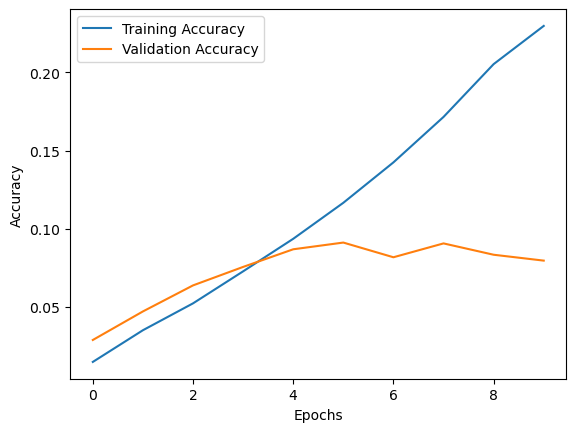

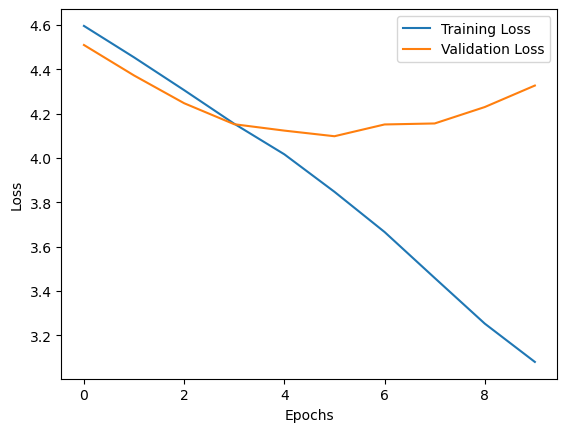

In [18]:
test_loss, test_accuracy = model_dropout.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import numpy as np

# Genereer voorspellingen
y_true = []
y_pred = []

# Verzamel echte labels en voorspelde labels
for images, labels in test_ds:  # test_ds moet een tf.data.Dataset zijn
    preds = model_dropout.predict(images, verbose=0)
    y_true.extend(labels.numpy())  # Echte labels
    y_pred.extend(np.argmax(preds, axis=1))  # Voorspelde labels

# Bereken metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Accuracy: 0.0797
Precision: 0.0764
Recall: 0.0797
F1 Score: 0.0693


### Techniek 2:
L2 zorgt voor : - Stabiliteit van het model:
                  L2 dwingt het model om kleinere gewichten te behouden. Hierdoor is het minder gevoelig voor kleine veranderingen in de trainingsdata, wat overfitting vermindert.
                - Combinatie met Dropout:
                  In jouw model gebruik je zowel L2-regularisatie als Dropout (0.5).

                    Dropout vermindert overfitting door neuronen willekeurig uit te schakelen.
                    L2 vermindert grote gewichten en maakt het model "gladder".
                    De combinatie hiervan zorgt voor robustere prestaties.
Dit zie je ook doordat dit model beter scoort dan het vorige model waar enkel dropout gebruikt word.

In [20]:
from tensorflow.keras import regularizers
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Model definitie
model_L2 = models.Sequential([
    # Convolutionele laag 1
    layers.Input(shape=(width, height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),

    # Convolutionele laag 2
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),

    # Convolutionele laag 3
    layers.Conv2D(128, (3, 3), activation='relu', 
                  kernel_regularizer=regularizers.l2(0.0001)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu', 
                 kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),  # 50% Dropout
    
    # Output laag
    layers.Dense(len(class_names), activation='softmax')
])

# Model compileren
model_L2.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_L2.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, 
                               restore_best_weights=True)

history_L2 = model_L2.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


C:\Users\frederic\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,299,109 (4.96 MB)

 Trainable params: 1,299,109 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.0125 - loss: 4.6653 - val_accuracy: 0.0260 - val_loss: 4.6193
Epoch 2/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.0224 - loss: 4.5963 - val_accuracy: 0.0365 - val_loss: 4.5131
Epoch 3/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0345 - loss: 4.4968 - val_accuracy: 0.0593 - val_loss: 4.3860
Epoch 4/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0523 - loss: 4.4004 - val_accuracy: 0.0700 - val_loss: 4.2953
Epoch 5/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.0635 - loss: 4.3117 - val_accuracy: 0.0749 - val_loss: 4.2339
Epoch 6/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.0791 - loss: 4.2406 - val_accuracy: 0.0891 - val_loss: 4.1621
Epoch 7/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0798 - loss: 4.1766 - val_accuracy: 0.0904 - val_loss: 4.1255
Epoch 8/10
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0918 - loss: 4.1165 - 

117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.1050 - loss: 4.0555
Test Loss: 4.044988632202148
Test Accuracy: 10.44%


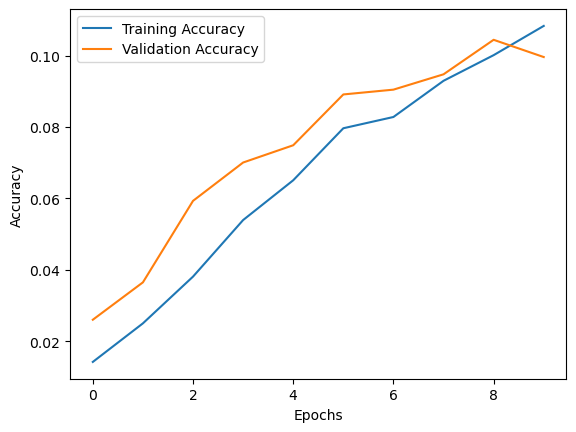

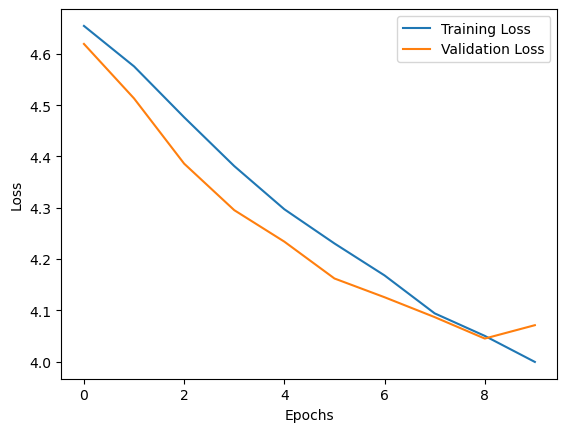

In [21]:
test_loss, test_accuracy = model_L2.evaluate(test_ds, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

plt.plot(history_L2.history['accuracy'], label='Training Accuracy')
plt.plot(history_L2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_L2.history['loss'], label='Training Loss')
plt.plot(history_L2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import numpy as np

# Genereer voorspellingen
y_true = []
y_pred = []

# Verzamel echte labels en voorspelde labels
for images, labels in test_ds:  # test_ds moet een tf.data.Dataset zijn
    preds = model_L2.predict(images, verbose=0)
    y_true.extend(labels.numpy())  # Echte labels
    y_pred.extend(np.argmax(preds, axis=1))  # Voorspelde labels

# Bereken metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.1044
Precision: 0.0748
Recall: 0.1044
F1 Score: 0.0730


C:\Users\frederic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Techniek 3:
Learning rate en optimizer

 We testen twee populaire optimizers, Adam en RMSprop, met elk twee verschillende learning rates (0.001 en 0.0001).
 Het doel is om te observeren hoe de keuze van de optimizer en learning rate het leerproces en de validatienauwkeurigheid beïnvloedt. We verwachten dat een goed gekozen optimizer met een passende learning rate sneller convergeert en een hogere nauwkeurigheid behaalt, terwijl te lage learning rates kunnen leiden tot traag leren en lagere prestaties. Op basis van de resultaten zullen we de combinatie identificeren die het beste generaliseert naar de validatiedata.

 Hier zien we dat bij de lr van 0.001 de beide modellen beter scoren dan bij 0.0001.
 alsook scoort RMSprop beter dan adam.

 Hoewel Adam vaak beter generaliseert op veel datasets, kan RMSprop:

    Sneller leren op kleinere of moeilijkere datasets met hoge complexiteit.
    Beter presteren bij instabiele gradiënten.


Testing optimizer: Adam, Learning rate: 0.001
Epoch 1/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.0115 - loss: 4.6375 - val_accuracy: 0.0177 - val_loss: 4.5955
Epoch 2/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0201 - loss: 4.5869 - val_accuracy: 0.0242 - val_loss: 4.5433
Epoch 3/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.0259 - loss: 4.5287 - val_accuracy: 0.0352 - val_loss: 4.5066
Epoch 4/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0456 - loss: 4.4259 - val_accuracy: 0.0502 - val_loss: 4.3475
Epoch 5/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0623 - loss: 4.3041 - val_accuracy: 0.0598 - val_loss: 4.3237
Epoch 6/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.0785 - loss: 4.1905 - val_accuracy: 0.0778 - val_loss: 4.2743
Epoch 7/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.0903 - loss: 4.0926 - val_accuracy: 0.0784 - val_loss: 4.2705
Validation accuracy: 0.0784


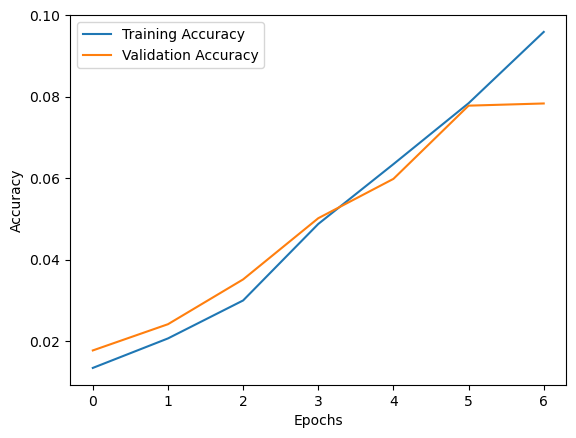

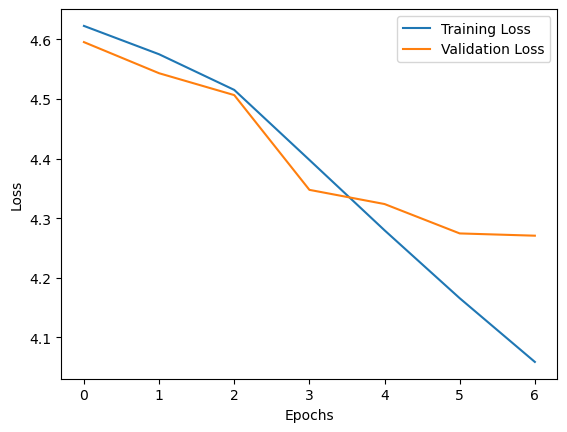


Testing optimizer: Adam, Learning rate: 0.0001
Epoch 1/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.0100 - loss: 4.6417 - val_accuracy: 0.0118 - val_loss: 4.6209
Epoch 2/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.0145 - loss: 4.6194 - val_accuracy: 0.0271 - val_loss: 4.5996
Epoch 3/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0184 - loss: 4.5842 - val_accuracy: 0.0362 - val_loss: 4.5477
Epoch 4/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0276 - loss: 4.5287 - val_accuracy: 0.0451 - val_loss: 4.4842
Epoch 5/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0327 - loss: 4.4825 - val_accuracy: 0.0499 - val_loss: 4.4375
Epoch 6/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0434 - loss: 4.4314 - val_accuracy: 0.0523 - val_loss: 4.3976
Epoch 7/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0419 - loss: 4.3875 - val_accuracy: 0.0644 - val_loss: 4.3422
Validation accuracy: 0.0644


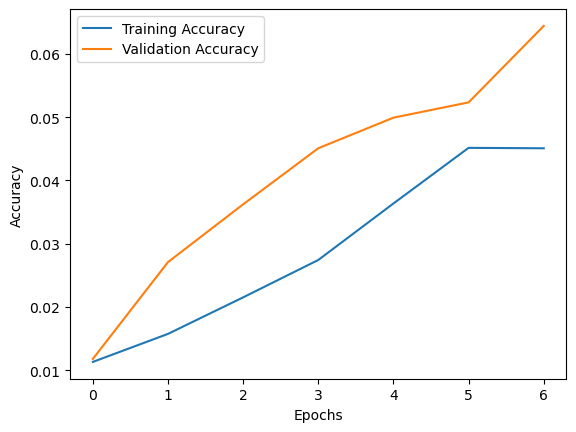

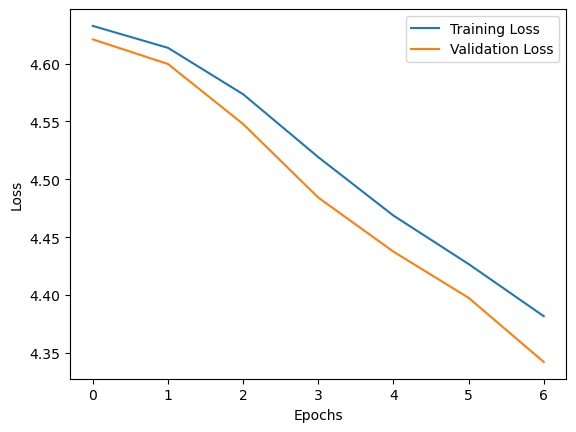


Testing optimizer: RMSprop, Learning rate: 0.001
Epoch 1/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.0127 - loss: 4.6346 - val_accuracy: 0.0443 - val_loss: 4.4968
Epoch 2/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.0373 - loss: 4.4692 - val_accuracy: 0.0644 - val_loss: 4.2957
Epoch 3/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.0587 - loss: 4.3115 - val_accuracy: 0.0751 - val_loss: 4.2115
Epoch 4/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.0766 - loss: 4.1981 - val_accuracy: 0.0802 - val_loss: 4.1644
Epoch 5/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.0909 - loss: 4.0744 - val_accuracy: 0.0913 - val_loss: 4.1759
Epoch 6/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.1062 - loss: 3.9692 - val_accuracy: 0.1063 - val_loss: 4.1008
Epoch 7/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.1411 - loss: 3.8253 - val_accuracy: 0.1122 - val_loss: 4.0507
Validation accuracy: 0.1122


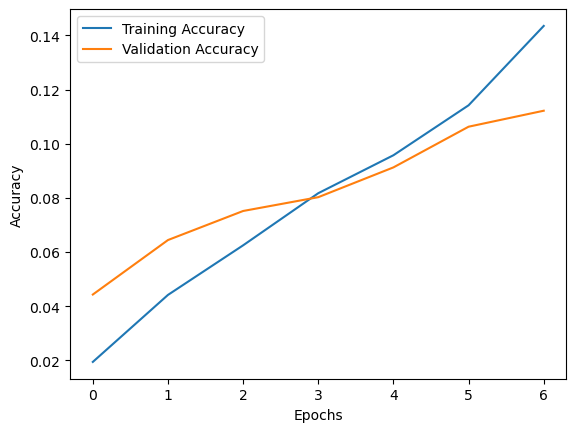

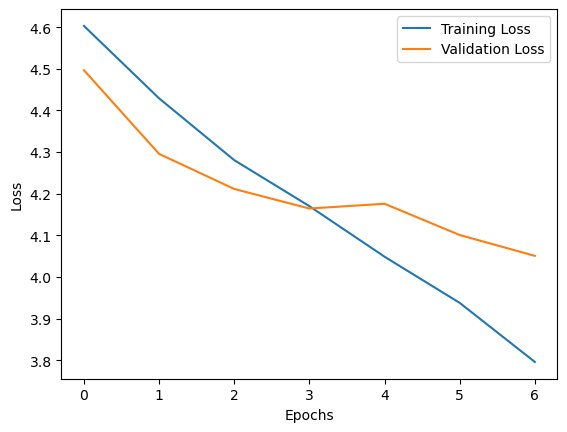


Testing optimizer: RMSprop, Learning rate: 0.0001
Epoch 1/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.0128 - loss: 4.6414 - val_accuracy: 0.0209 - val_loss: 4.6256
Epoch 2/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.0157 - loss: 4.6238 - val_accuracy: 0.0209 - val_loss: 4.5936
Epoch 3/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.0194 - loss: 4.5857 - val_accuracy: 0.0266 - val_loss: 4.5556
Epoch 4/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.0244 - loss: 4.5437 - val_accuracy: 0.0416 - val_loss: 4.5051
Epoch 5/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.0369 - loss: 4.4925 - val_accuracy: 0.0454 - val_loss: 4.4609
Epoch 6/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.0367 - loss: 4.4503 - val_accuracy: 0.0569 - val_loss: 4.4017
Epoch 7/7
466/466 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.0420 - loss: 4.3986 - val_accuracy: 0.0593 - val_loss: 4.3602
Validation accuracy: 0.0593


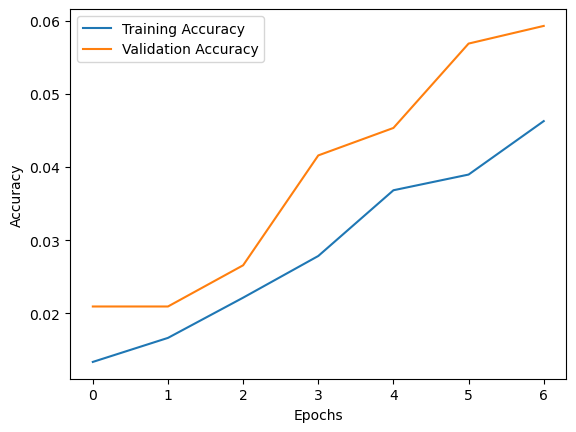

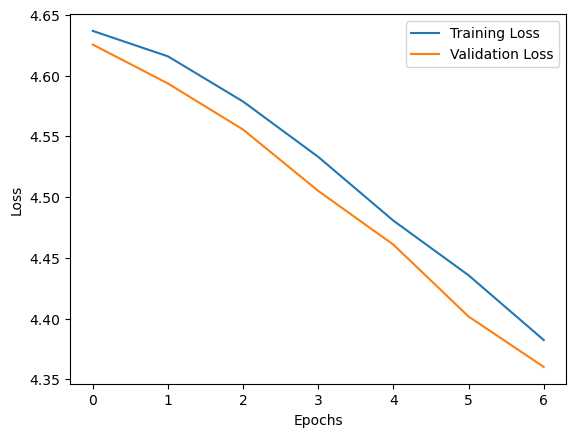

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Definieer combinaties van optimizers en learning rates
optimizers_list = {
    'Adam': optimizers.Adam,
    'RMSprop': optimizers.RMSprop
}
learning_rates = [0.001, 0.0001]

# Functie om het model te bouwen
def build_model(optimizer, learning_rate):
    model_lropt = models.Sequential([
        layers.Input(shape=(width, height, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu', 
                     kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation='softmax')
    ])
    
    opt = optimizer(learning_rate=learning_rate)
    model_lropt.compile(optimizer=opt, loss='sparse_categorical_crossentropy', 
                        metrics=['accuracy'])
    return model_lropt

results = []
for opt_name, opt_func in optimizers_list.items():
    for lr in learning_rates:
        print(f"\nTesting optimizer: {opt_name}, Learning rate: {lr}")
        model_lropt = build_model(opt_func, lr)
        history_lropt = model_lropt.fit(
            train_ds,
            validation_data=test_ds,
            epochs=7,
            batch_size=32,
            verbose=1
        )

        val_acc = max(history_lropt.history['val_accuracy'])
        print(f"Validation accuracy: {val_acc:.4f}")

        plt.plot(history_lropt.history['accuracy'], 
                 label='Training Accuracy')
        plt.plot(history_lropt.history['val_accuracy'], 
                 label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
        plt.plot(history_lropt.history['loss'], 
                 label='Training Loss')
        plt.plot(history_lropt.history['val_loss'], 
                 label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

### Techniek 4:
Data Augmentation

Door data augmentation met ImageDataGenerator krijg je virtueel meer beelden tijdens het trainen, maar het totale aantal originele afbeeldingen blijft hetzelfde.

Data augmentation genereert nieuwe versies van bestaande afbeeldingen tijdens de training. Dit gebeurt on-the-fly: de afbeeldingen worden in het geheugen aangepast terwijl ze aan je model worden gevoed.
Hierdoor ziet je model bij elke epoch andere versies van dezelfde originele afbeeldingen (met rotaties, flips, verschuivingen, enz.), wat helpt om overfitting te verminderen en het model robuuster te maken.

Als je 1000 originele afbeeldingen hebt en je batchgrootte is 32, krijg je per epoch ongeveer 32 batches met augmented afbeeldingen. Bij elke epoch wordt de augmentation opnieuw toegepast, zodat het model steeds nieuwe variaties ziet.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_aug = models.Sequential([
    layers.Input(shape=(width, height, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

datagen = ImageDataGenerator(
    rescale=1./255,         # Normaliseren
    rotation_range=20,      # Willekeurige rotatie (tot 20 graden)
    width_shift_range=0.2,  # Horizontale verschuiving
    height_shift_range=0.2, # Verticale verschuiving
    shear_range=0.2,        # Schuine transformatie
    zoom_range=0.2,         # In- en uitzoomen
    horizontal_flip=True,   # Willekeurige horizontale flip
    fill_mode='nearest'     # Strategie voor nieuwe pixels
)

train_generator = datagen.flow_from_directory(
    './dataset',  # Pad naar trainingsdataset
    target_size=(width, height),  # Beeldgrootte
    batch_size=32,
    class_mode='sparse'  # Multiclass classificatie
)
print(f"Trainingset: {len(train_generator)} batches")

model_aug.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_aug.summary()

history_aug = model_aug.fit(
    train_generator,
    validation_data=test_ds,
    epochs=15,
    batch_size=batch_size,
    verbose=1
)

Found 18631 images belonging to 101 classes.
Trainingset: 583 batches


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,638,181 (6.25 MB)

 Trainable params: 1,638,181 (6.25 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\frederic\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 69s 116ms/step - accuracy: 0.0108 - loss: 4.6238 - val_accuracy: 0.0290 - val_loss: 4.5265
Epoch 2/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 68s 117ms/step - accuracy: 0.0263 - loss: 4.5334 - val_accuracy: 0.0413 - val_loss: 4.3918
Epoch 3/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 67s 116ms/step - accuracy: 0.0382 - loss: 4.4271 - val_accuracy: 0.0537 - val_loss: 4.2533
Epoch 4/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 68s 116ms/step - accuracy: 0.0440 - loss: 4.3702 - val_accuracy: 0.0687 - val_loss: 4.1735
Epoch 5/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 68s 116ms/step - accuracy: 0.0526 - loss: 4.2950 - val_accuracy: 0.0727 - val_loss: 4.1720
Epoch 6/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 68s 117ms/step - accuracy: 0.0595 - loss: 4.2633 - val_accuracy: 0.0827 - val_loss: 4.0720
Epoch 7/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 67s 115ms/step - accuracy: 0.0628 - loss: 4.2236 - val_accuracy: 0.0942 - val_loss: 4.0035
Epoch 8/15
583/583 ━━━━━━━━━━━━━━━━━━━━ 67s 115ms/step - accuracy: 0.0686 - loss: 4

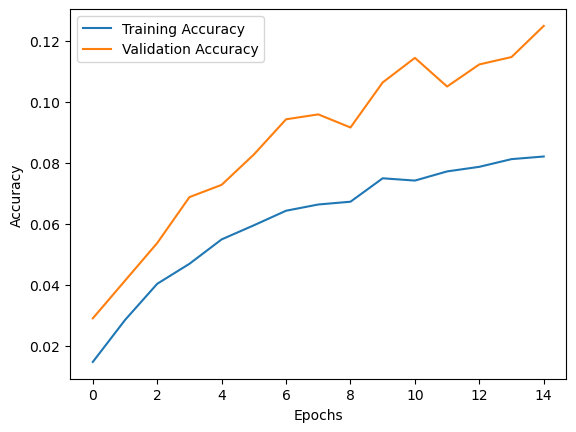

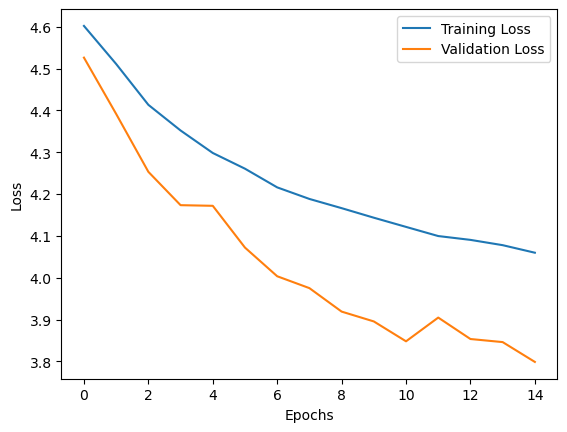

In [26]:
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

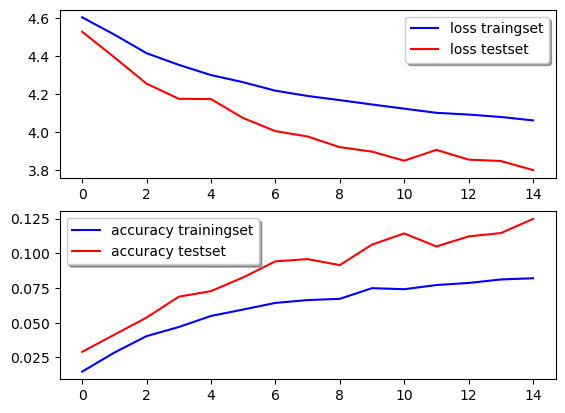

In [27]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history_aug.history['loss'], color='b', label='loss traingset')
ax[0].plot(history_aug.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_aug.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history_aug.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import numpy as np

# Genereer voorspellingen
y_true = []
y_pred = []

# Verzamel echte labels en voorspelde labels
for images, labels in test_ds:  # test_ds moet een tf.data.Dataset zijn
    preds = model_aug.predict(images, verbose=0)
    y_true.extend(labels.numpy())  # Echte labels
    y_pred.extend(np.argmax(preds, axis=1))  # Voorspelde labels

# Bereken metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.1248
Precision: 0.0948
Recall: 0.1248
F1 Score: 0.0841


C:\Users\frederic\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Techniek 5

Tranfer learning

Een predefined model zoals MobileNetV2 presteert beter dan mijn eerder gebouwde modellen, omdat het vooraf getraind is op een grote dataset (ImageNet). Dit betekent dat het model al hoogwaardige feature-extractors heeft geleerd die nuttig zijn voor het herkennen van algemene patronen in afbeeldingen, zoals vormen, randen en texturen.

In mijn experiment zien we dat je met MobileNetV2 een validatie-accuray van ~30% bereikt, vergeleken met ~10% bij mijn eerdere modellen. Dit verschil komt doordat:

    Pretrained modellen sneller en efficiënter relevante features kunnen leren dankzij hun voorgetrainde gewichten.
    Je alleen de bovenste lagen traint, waardoor het model zich kan focussen op je specifieke dataset zonder het volledige netwerk vanaf nul te trainen.
    MobileNetV2 een diepe en geoptimaliseerde architectuur heeft die goed generaliseert, zelfs met kleinere datasets zoals jouw geval.

Dit laat zien dat transfer learning met predefined modellen een krachtige techniek is om betere prestaties te behalen met minder trainingstijd en data. 🚀




In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Laad MobileNetV2 met inputgrootte 128x128
base_model = MobileNetV2(weights='imagenet', include_top=False, 
                         input_shape=(128, 128, 3))

# Freeze de convolutionele lagen
base_model.trainable = False

# Maak het complete model
model_mobile = models.Sequential([
    base_model, 
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compileer het model
model_mobile.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Data augmentatie en splitten van de dataset (80/20)
datagen = ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% van de data voor validatie
)

# Trainingsdata generator (80%)
train_generator = datagen.flow_from_directory(
    './dataset',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='training'  # Alleen trainingsdata
)

# Validatiedata generator (20%)
val_generator = datagen.flow_from_directory(
    './dataset',  
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Alleen validatiedata
)

# Samenvatting van het aantal samples
print(f"Train samples: {train_generator.samples}")
print(f"Validation samples: {val_generator.samples}")

# Trainen van het model
history_predef = model_mobile.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 14945 images belonging to 101 classes.
Found 3686 images belonging to 101 classes.
Train samples: 14945
Validation samples: 3686


C:\Users\frederic\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 124s 254ms/step - accuracy: 0.0406 - loss: 4.5094 - val_accuracy: 0.1991 - val_loss: 3.5848
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 115s 247ms/step - accuracy: 0.1518 - loss: 3.6945 - val_accuracy: 0.2537 - val_loss: 3.1636
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 105s 224ms/step - accuracy: 0.1920 - loss: 3.4105 - val_accuracy: 0.2870 - val_loss: 3.0271
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 105s 225ms/step - accuracy: 0.2037 - loss: 3.3761 - val_accuracy: 0.2827 - val_loss: 3.0093
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 105s 224ms/step - accuracy: 0.2280 - loss: 3.2885 - val_accuracy: 0.3001 - val_loss: 2.9474
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 106s 227ms/step - accuracy: 0.2381 - loss: 3.2542 - val_accuracy: 0.2971 - val_loss: 2.9467
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 106s 227ms/step - accuracy: 0.2334 - loss: 3.2720 - val_accuracy: 0.3036 - val_loss: 2.9393
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 104s 223ms/step - accuracy: 0.2481 -

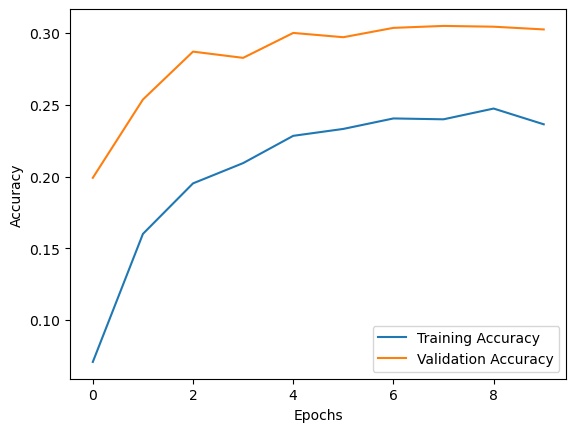

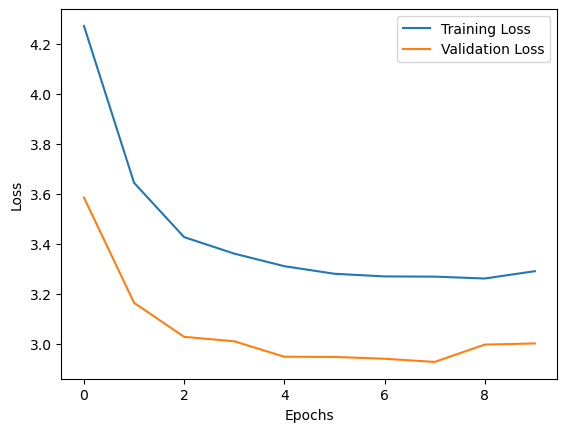

In [30]:
plt.plot(history_predef.history['accuracy'], label='Training Accuracy')
plt.plot(history_predef.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_predef.history['loss'], label='Training Loss')
plt.plot(history_predef.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

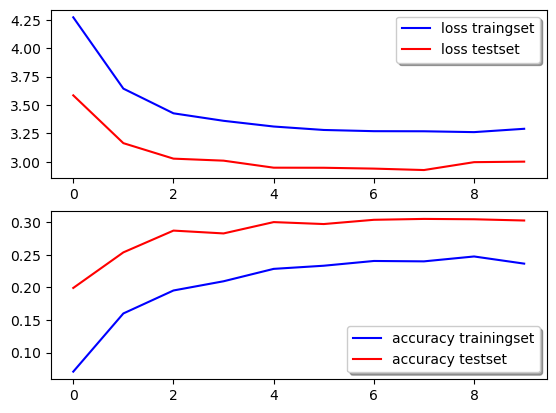

In [31]:
_, ax = plt.subplots(2, 1)
ax[0].plot(history_predef.history['loss'], color='b', label='loss traingset')
ax[0].plot(history_predef.history['val_loss'], color='r', label='loss testset')
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_predef.history['accuracy'], color='b', label='accuracy trainingset')
ax[1].plot(history_predef.history['val_accuracy'], color='r', label='accuracy testset')
legend = ax[1].legend(loc='best', shadow=True)

## Model evaluatie

Evalueer de kwaliteit van je model op een correctie manier:
- Prestatiemeting: Evalueer het model op de validatie- en testsets met relevante metrieken (zoals bv. accuracy, precision, recall, F1-score, ROC-curve).
- Cross-validatie: Gebruik technieken zoals k-fold cross-validatie om de robuustheid van het model te verzekeren.
- Analyse van resultaten: Bestudeer en bespreek je resultaten.

Transfer learning is de grote winnaar maar da ligt aan dat het een pre defined model is. 
Data augmentation is de 2de beste wat logis is want dit model heeft meer trainingsdata gezien in het totaal waardoor dit ook beter kan scoren dan.
Dropout en L2 met dropout zijn de 3de beste deze gaat meer generaliseren.
Het laagste is dan de optimizers met de learning rates, deze scoren niet top maar niet veel slechter dan andere.

Conclusie: Het probleem ligt aan de dataset omdat deze teveel categorieen heeft en maar een beperkt aantal images per categorie waardoor het model niet goed getraind kan worden.